In [14]:
import pickle
import json
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [15]:
with open('../tracker_stub/player_detections9.pkl', 'rb') as f:
    data = pickle.load(f)

with open('../tracker_stub/court_keypoint_detections9.json', 'rb') as f:
    court_keypoints = json.load(f)

In [16]:
court_keypoints=court_keypoints[0] 

In [17]:
data

[{1: [349.53375244140625,
   726.4808349609375,
   528.50244140625,
   1003.4555053710938],
  2: [1086.5595703125,
   186.4952392578125,
   1173.6563720703125,
   372.643798828125],
  3: [997.5215454101562,
   167.89532470703125,
   1066.57080078125,
   279.5855712890625],
  4: [697.9039916992188,
   182.15289306640625,
   760.5121459960938,
   279.06494140625],
  5: [1295.047119140625,
   169.03512573242188,
   1369.599853515625,
   281.16497802734375],
  6: [530.1822509765625,
   134.889892578125,
   581.2135620117188,
   274.7113037109375],
  7: [1466.397216796875,
   138.7279052734375,
   1516.2764892578125,
   276.5380859375],
  8: [1722.1995849609375,
   508.63018798828125,
   1873.0177001953125,
   610.8495483398438],
  9: [1782.670166015625,
   251.63336181640625,
   1871.72607421875,
   424.20220947265625]},
 {1: [350.0472412109375,
   726.01123046875,
   529.8375854492188,
   1001.1898803710938],
  2: [1084.260009765625,
   186.0725860595703,
   1171.4708251953125,
   372.532

In [18]:
df = pd.DataFrame(data)

# Splitting each list in the columns into separate columns
df_expanded = pd.concat([df[col].apply(pd.Series) for col in df.columns], axis=1)

# Renaming the columns to reflect the original column names and their new index
df_expanded.columns = [f'{orig_col}_{i+1}' for orig_col in df.columns for i in range(4)]

# Replacing NaN values with zero
df_expanded = df_expanded.fillna(0)

# Converting all values to integers
df_expanded = df_expanded.astype(int)

# Displaying the resulting DataFrame
print(df_expanded)


     1_1  1_2  1_3   1_4   2_1  2_2   2_3  2_4  3_1  3_2  ...  88_3  88_4  \
0    349  726  528  1003  1086  186  1173  372  997  167  ...     0     0   
1    350  726  529  1001  1084  186  1171  372  997  167  ...     0     0   
2    349  727  534  1000  1082  186  1168  372  997  167  ...     0     0   
3    349  730  542  1000  1081  186  1166  372  997  168  ...     0     0   
4    348  732  548  1000  1081  187  1164  372  997  168  ...     0     0   
..   ...  ...  ...   ...   ...  ...   ...  ...  ...  ...  ...   ...   ...   
622  626  824  731  1079  1111  219  1201  358  978  138  ...   372   229   
623  629  819  741  1079  1111  220  1200  358  978  138  ...   372   229   
624  631  812  751  1080  1112  220  1200  358  978  138  ...   372   229   
625  635  807  758  1080  1114  220  1202  358  978  138  ...   372   229   
626  646  803  766  1080  1119  220  1205  357  978  138  ...   372   229   

     83_1  83_2  83_3  83_4  93_1  93_2  93_3  93_4  
0       0     0     0

In [19]:
# Group the columns by the first number in their names
grouped_columns = df_expanded.columns.to_series().groupby(lambda x: x.split('_')[0])

# Convert the grouped columns to a dictionary for easier access
grouped_columns_dict = {group: list(columns) for group, columns in grouped_columns}

# Display the grouped columns
for group, columns in grouped_columns_dict.items():
    print(f"Group {group}: {columns}")

# Initialize variables to store the chosen columns and their unique counts
chosen_columns = {}
unique_counts = {}

# Iterate over the groups
for group, columns in grouped_columns_dict.items():
    # Find the column with the maximum number of unique values in the group
    max_unique_column = max(columns, key=lambda x: df_expanded[x].nunique())
    
    # Store the chosen column and its unique count
    chosen_columns[group] = max_unique_column
    unique_counts[group] = df_expanded[max_unique_column].nunique()

# Sort the groups based on their unique counts in descending order
sorted_groups = sorted(unique_counts.items(), key=lambda x: x[1], reverse=True)

# Select the top two groups
top_two_groups = sorted_groups[:2]

# Display the top two groups and their chosen columns
for group, unique_count in top_two_groups:
    print(f"Group {group} - Unique Count: {unique_count}, Chosen Column: {chosen_columns[group]}")

# Initialize variables to store column names from top two groups
columns_top_groups = []

# Iterate over the top two groups
for group, chosen_column in top_two_groups:
    # Extract column names from the group
    columns_top_groups.extend(grouped_columns_dict[group])

# Display the column names from the top two groups
print("Columns from top two groups:")
print(columns_top_groups)



Group 1: ['1_1', '1_2', '1_3', '1_4']
Group 2: ['2_1', '2_2', '2_3', '2_4']
Group 3: ['3_1', '3_2', '3_3', '3_4']
Group 4: ['4_1', '4_2', '4_3', '4_4']
Group 5: ['5_1', '5_2', '5_3', '5_4']
Group 6: ['6_1', '6_2', '6_3', '6_4']
Group 7: ['7_1', '7_2', '7_3', '7_4']
Group 8: ['8_1', '8_2', '8_3', '8_4']
Group 80: ['80_1', '80_2', '80_3', '80_4']
Group 83: ['83_1', '83_2', '83_3', '83_4']
Group 86: ['86_1', '86_2', '86_3', '86_4']
Group 88: ['88_1', '88_2', '88_3', '88_4']
Group 9: ['9_1', '9_2', '9_3', '9_4']
Group 93: ['93_1', '93_2', '93_3', '93_4']
Group 1 - Unique Count: 453, Chosen Column: 1_3
Group 2 - Unique Count: 288, Chosen Column: 2_1
Columns from top two groups:
['1_1', '1_2', '1_3', '1_4', '2_1', '2_2', '2_3', '2_4']


In [20]:
df_player_positions = df_expanded[columns_top_groups]
column_mapping = {'1_1':'p1_x1','1_2':'p1_y1','1_3':'p1_x2','1_4':'p1_y2',
                  '2_1':'p2_x1','2_2':'p2_y1','2_3':'p2_x2','2_4':'p2_y2'}
df_player_positions = df_player_positions.rename(columns=column_mapping)
df_player_positions

,p1_x1,p1_y1,p1_x2,p1_y2,p2_x1,p2_y1,p2_x2,p2_y2
0,349,726,528,1003,1086,186,1173,372
1,350,726,529,1001,1084,186,1171,372
2,349,727,534,1000,1082,186,1168,372
3,349,730,542,1000,1081,186,1166,372
4,348,732,548,1000,1081,187,1164,372
...,...,...,...,...,...,...,...,...
622,626,824,731,1079,1111,219,1201,358
623,629,819,741,1079,1111,220,1200,358
624,631,812,751,1080,1112,220,1200,358
625,635,807,758,1080,1114,220,1202,358


In [21]:
df_player_positions = df_player_positions.interpolate()
df_player_positions = df_player_positions.bfill()

In [22]:
df_player_positions['p1_mid_y'] = (df_player_positions['p1_y1'] + df_player_positions['p1_y2'])/2
df_player_positions['p1_mid_x'] = (df_player_positions['p1_x1'] + df_player_positions['p1_x2'])/2

df_player_positions['p2_mid_y'] = (df_player_positions['p2_y1'] + df_player_positions['p2_y2'])/2
df_player_positions['p2_mid_x'] = (df_player_positions['p2_x1'] + df_player_positions['p2_x2'])/2

In [23]:
df_player_positions

,p1_x1,p1_y1,p1_x2,p1_y2,p2_x1,p2_y1,p2_x2,p2_y2,p1_mid_y,p1_mid_x,p2_mid_y,p2_mid_x
0,349,726,528,1003,1086,186,1173,372,864.5,438.5,279.0,1129.5
1,350,726,529,1001,1084,186,1171,372,863.5,439.5,279.0,1127.5
2,349,727,534,1000,1082,186,1168,372,863.5,441.5,279.0,1125.0
3,349,730,542,1000,1081,186,1166,372,865.0,445.5,279.0,1123.5
4,348,732,548,1000,1081,187,1164,372,866.0,448.0,279.5,1122.5
...,...,...,...,...,...,...,...,...,...,...,...,...
622,626,824,731,1079,1111,219,1201,358,951.5,678.5,288.5,1156.0
623,629,819,741,1079,1111,220,1200,358,949.0,685.0,289.0,1155.5
624,631,812,751,1080,1112,220,1200,358,946.0,691.0,289.0,1156.0
625,635,807,758,1080,1114,220,1202,358,943.5,696.5,289.0,1158.0


In [30]:
player1_positions = list(zip(df_player_positions['p1_mid_x'], df_player_positions['p1_y2']))
player2_positions = list(zip(df_player_positions['p2_mid_x'], df_player_positions['p2_y2']))

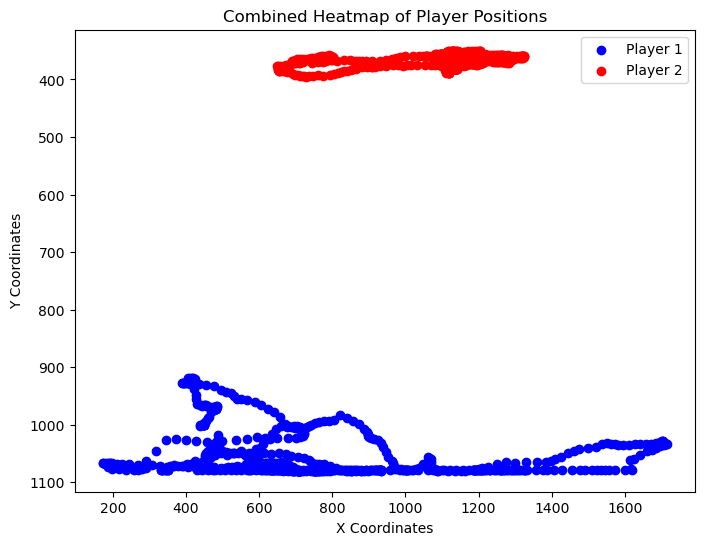

In [31]:
# Extract x and y coordinates from the list of tuples for player 1
x_coords_player1 = [coord[0] for coord in player1_positions]
y_coords_player1 = [coord[1] for coord in player1_positions]

# Extract x and y coordinates from the list of tuples for player 2
x_coords_player2 = [coord[0] for coord in player2_positions]
y_coords_player2 = [coord[1] for coord in player2_positions]

# Create a scatter plot with both sets of coordinates
plt.figure(figsize=(8, 6))

plt.scatter(x_coords_player1, y_coords_player1, c='b', alpha=1, label='Player 1')
plt.scatter(x_coords_player2, y_coords_player2, c='r', alpha=1, label='Player 2')

# Set the title and labels
plt.title('Combined Heatmap of Player Positions')
plt.xlabel('X Coordinates')
plt.ylabel('Y Coordinates')

# Add a legend
plt.legend()


# Flip the image by inverting the x and y axis

plt.gca().invert_yaxis()

# Show the plot
plt.show()


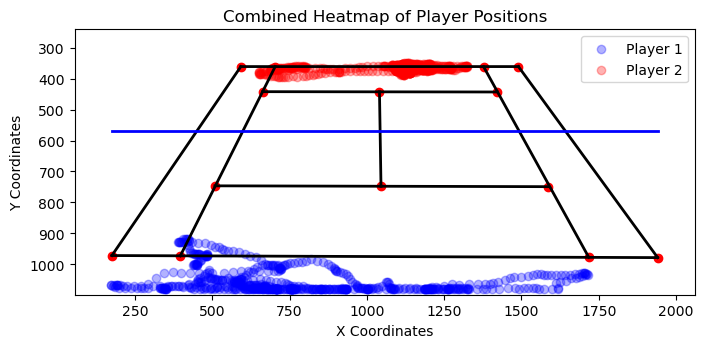

In [32]:
import matplotlib.pyplot as plt

class TennisCourt():
    def __init__(self, court_keypoints=None, connections=None, padding=50):
        self.court_keypoints = court_keypoints
        self.connections = connections
        self.padding = padding

    def draw_court(self, ax):
        # Plot court keypoints
        for i in range(0, len(self.court_keypoints), 2):
            ax.plot(self.court_keypoints[i], self.court_keypoints[i+1], 'ro')

        # Plot connections
        for connection in self.connections:
            start_point = connection[0] * 2
            end_point = connection[1] * 2
            ax.plot([self.court_keypoints[start_point], self.court_keypoints[end_point]], 
                    [self.court_keypoints[start_point+1], self.court_keypoints[end_point+1]], 
                    'k-', linewidth=2)
        
        ax.set_aspect('equal')

        # Set limits of x and y axes with padding
        ax.set_xlim(min(self.court_keypoints[::2]) - self.padding, max(self.court_keypoints[::2]) + self.padding)
        ax.set_ylim(min(self.court_keypoints[1::2]) - self.padding, max(self.court_keypoints[1::2]) + self.padding)

        # Draw the net
        net_start_point = (min(self.court_keypoints[::2]), int((min(self.court_keypoints[1::2]) + max(self.court_keypoints[1::2])) / 2))
        net_end_point = (max(self.court_keypoints[::2]), int((min(self.court_keypoints[1::2]) + max(self.court_keypoints[1::2])) / 2))
        ax.plot([net_start_point[0], net_end_point[0]], [.85*net_start_point[1], .85*net_start_point[1]], 'b-', linewidth=2)

        # Invert y-axis to flip the image upside down
        ax.invert_yaxis()

# Extract x and y coordinates from the list of tuples for player 1
x_coords_player1 = [coord[0] for coord in player1_positions]
y_coords_player1 = [coord[1] for coord in player1_positions]

# Extract x and y coordinates from the list of tuples for player 2
x_coords_player2 = [coord[0] for coord in player2_positions]
y_coords_player2 = [coord[1] for coord in player2_positions]


connections = [
    (0, 2), (4, 5), (6, 7), (1, 3),
    (0, 1), (8, 9), (10, 11), (12, 13), (2, 3)
]

# Create a TennisCourt instance with court keypoints, connections, and padding
tennis_court = TennisCourt(court_keypoints=court_keypoints, connections=connections, padding=120)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Draw the tennis court
tennis_court.draw_court(ax)

# Overlay the scatter plot with player positions
ax.scatter(x_coords_player1, y_coords_player1, c='b', alpha=0.3, label='Player 1')
ax.scatter(x_coords_player2, y_coords_player2, c='r', alpha=0.3, label='Player 2')


# Set the title and labels
ax.set_title('Combined Heatmap of Player Positions')
ax.set_xlabel('X Coordinates')
ax.set_ylabel('Y Coordinates')

# Add a legend
ax.legend()

# Show the plot
plt.show()
